In [104]:
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [105]:
browser = Browser('chrome')

In [106]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [107]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
html = browser.html
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.

In [108]:
table = soup.find('table')
headers = [th.text.strip() for th in table.find('tr').find_all('th')]
data_rows = [ [td.text.strip() for td in tr.find_all('td')] for tr in table.find_all('tr')[1:] ]

In [109]:
mars_df = pd.DataFrame(data_rows, columns=headers)
mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [110]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [111]:
new_mars_df= mars_df.astype({"sol": int, "ls": int, "month": int, "min_temp": float, "pressure": float})
new_mars_df["terrestrial_date"]= pd.to_datetime(new_mars_df["terrestrial_date"])
new_mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [112]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [113]:
print("Number of Martian months:", len(mars_df['month'].unique()))

Number of Martian months: 12


In [114]:
print("Number of Martian days:", len(mars_df))

Number of Martian days: 1867


In [115]:
avg_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print("Coldest month:", avg_temp_by_month.idxmin())
print("Warmest month:", avg_temp_by_month.idxmax())

Coldest month: 3
Warmest month: 8


In [116]:
avg_temp_by_month = mars_df.groupby(['month']).mean(['min_temp'])
low_temp= average_low_temp.filter(["month", "min_temp"])
print("Coldest month:", avg_temp_by_month.idxmin())
print("Warmest month:", avg_temp_by_month.idxmax())
print(low_temp)

Coldest month: sol         7
min_temp    3
pressure    6
dtype: object
Warmest month: sol         4
min_temp    8
pressure    9
dtype: object
        min_temp
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


<function matplotlib.pyplot.show(close=None, block=None)>

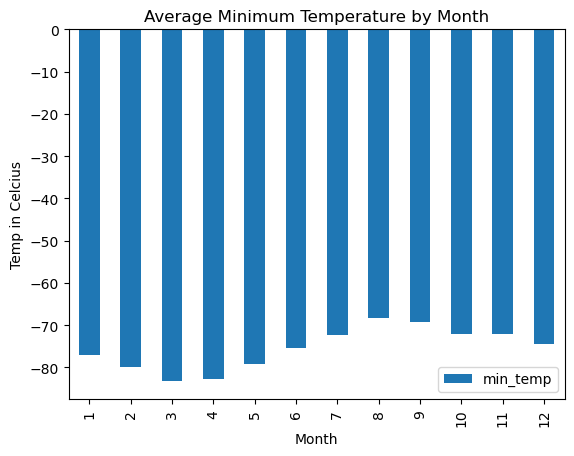

In [117]:
low_temp.plot(kind="bar", title="Average Minimum Temperature by Month")
plt.ylabel("Temp in Celcius")
plt.xlabel("Month")
plt.show
#avg_low_temp.plot(kind='bar', title="Average Minimum Temperature by Martian Month")

<function matplotlib.pyplot.show(close=None, block=None)>

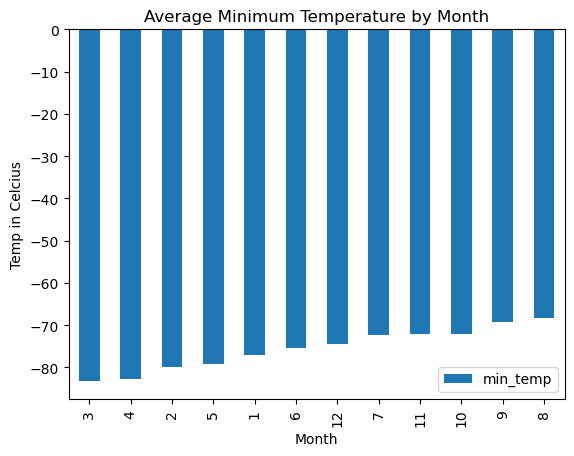

In [118]:
cold_hot= simplified_low_temp.sort_values(by = "min_temp", ascending= True)
cold_hot.plot(kind= "bar", title="Average Minimum Temperature by Month")
plt.ylabel("Temp in Celcius")
plt.xlabel("Month")
plt.show
#avg_pressure_by_month.plot(kind='bar', title="Average Atmospheric Pressure by Martian Month")

In [119]:
average_pressure= new_mars_df.groupby(["month"]).mean(["pressure"])
pressure= average_low_temp.filter(["month", "pressure"])
pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<function matplotlib.pyplot.show(close=None, block=None)>

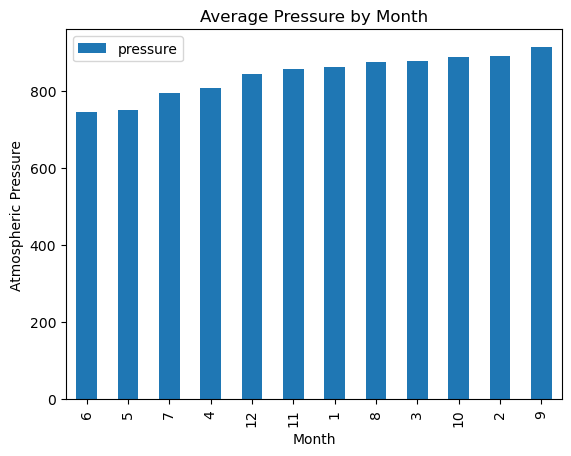

In [120]:
pressure_by_month= pressure.sort_values(by = "pressure", ascending= True)
pressure_by_month.plot(kind= "bar" , title="Average Pressure by Month")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

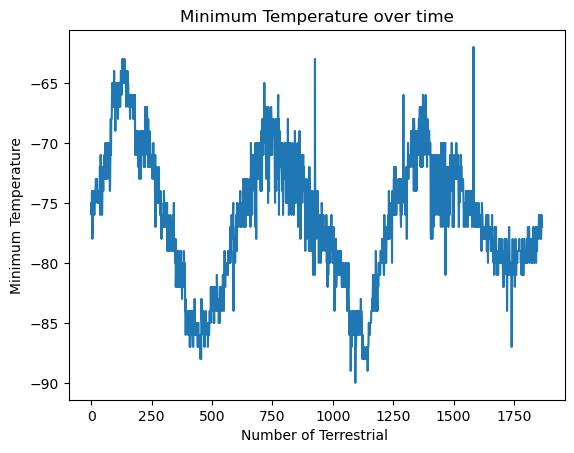

In [121]:
new_mars_df["min_temp"].plot(kind="line", title="Minimum Temperature over time")
plt.ylabel("Minimum Temperature")
plt.xlabel("Number of Terrestrial ")
plt.show

In [122]:
# In Mars the third month is the coldest where the minimum temperature is 83, and the eighth month is the warmest with a minimum temperature of 68. However, it's mostly cold on Mars for the rest of the year!

# Atmospheric pressure is lowest in the sixth month and highest in the ninth month.

# A year on Mars lasts 669.6 sols, where it's the same as 687 Earth days. Mars' axis of rotation is tilted 25 degrees concerning the plane of its orbit around the Sun.

In [123]:
new_mars_df.to_csv('Mars_df_csv.csv')

In [124]:
browser.quit()